In [258]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt




In [259]:
data_sp = {
    '1978': 41.0,
    '1987': 39.5,
    '1993': 37.0,
    '1997': 36.0,
    '2001': 34.5,
    '2006': 29.5,
    '2009': 27.0,
    '2011': 24.5,
    '2014': 23.0,
    '2017': 21.5,
    '2020': 18.0
}

In [260]:
df_no = pd.read_excel("data_washed/norway_smokers.xlsx").drop(columns=["Unnamed: 0"])
df_no = df_no.rename(columns={"Unnamed: 2": "Year", "Unnamed: 3": "smokers_percentage"})
df_no["Year"] = pd.to_numeric(df_no["Year"], errors="coerce")
df_no = df_no.dropna(subset=["Year", "smokers_percentage"]).reset_index(drop=True)
df_no["Year"] = df_no["Year"].astype(int)

In [261]:
df_sp = pd.Series(data_sp, name='smokers_percentage').reset_index().rename(columns={'index': 'Year'})
df_sp['Year'] = pd.to_numeric(df_sp['Year'], errors='coerce').astype(int)

# --- FIX: merge Norway and Spain by the common 'Year' column (was merging df_no with itself on "year") ---
df = df_no.merge(df_sp, on='Year', how='inner', suffixes=('_no', '_sp'))
# If you want a long panel instead, skip the merge and create long format later (you already do that below)
# df_long = pd.concat([df_sp_long, df_no_long], ignore_index=True)
df = df.head(-3)
# ...existing code...
df

,Year,smokers_percentage_no,smokers_percentage_sp
0,1978,38.0,41.0
1,1987,37.0,39.5
2,1993,36.0,37.0
3,1997,34.0,36.0
4,2001,29.0,34.5
5,2006,23.0,29.5
6,2009,20.0,27.0
7,2011,17.0,24.5


In [262]:
df = df.sort_values('Year').reset_index(drop=True)

# Create a complete range of years from min to max
full_years = pd.DataFrame({'Year': range(df['Year'].min(), df['Year'].max() + 1)})
df = full_years.merge(df, on='Year', how='left')

df['smokers_percentage_no'] = df['smokers_percentage_no'].interpolate(method='linear')
df['smokers_percentage_sp'] = df['smokers_percentage_sp'].interpolate(method='linear')

# Show first few rows
df = df.head(-3)
df

,Year,smokers_percentage_no,smokers_percentage_sp
0,1978,38.000000,41.000000
1,1979,37.888889,40.833333
2,1980,37.777778,40.666667
3,1981,37.666667,40.500000
4,1982,37.555556,40.333333
5,1983,37.444444,40.166667
6,1984,37.333333,40.000000
7,1985,37.222222,39.833333
8,1986,37.111111,39.666667
9,1987,37.000000,39.500000


In [263]:
tobacco_price_no = pd.read_excel("data_raw/tobacco/norge_tobakk.xlsx", sheet_name="Monthly")
tobacco_price_sp = pd.read_excel("data_raw/tobacco/spania_tobakk.xlsx", sheet_name="Monthly")

In [264]:
tobacco_price_no

,observation_date,CP0220NOM086NEST
0,1996-01-01,30.9
1,1996-02-01,31.1
2,1996-03-01,31.1
3,1996-04-01,31.0
4,1996-05-01,31.0
...,...,...
351,2025-04-01,143.2
352,2025-05-01,143.2
353,2025-06-01,143.5
354,2025-07-01,144.4


In [265]:
tobacco_price_sp

,observation_date,CP0220ESM086NEST
0,1996-01-01,27.65
1,1996-02-01,27.65
2,1996-03-01,27.68
3,1996-04-01,27.68
4,1996-05-01,27.68
...,...,...
351,2025-04-01,125.38
352,2025-05-01,127.07
353,2025-06-01,128.86
354,2025-07-01,128.86


In [266]:
# Assume your DataFrame is called df_price
tobacco_price_sp['observation_date'] = pd.to_datetime(tobacco_price_sp['observation_date'])
tobacco_price_sp['Year'] = tobacco_price_sp['observation_date'].dt.year
tobacco_price_sp['Month'] = tobacco_price_sp['observation_date'].dt.month

# Filter for January only
tobacco_price_sp = tobacco_price_sp[tobacco_price_sp['Month'] == 1].copy()

# Keep only one row per year (the January value)
tobacco_price_sp = tobacco_price_sp[['Year', 'CP0220ESM086NEST', 'observation_date']].reset_index(drop=True)
tobacco_price_sp = tobacco_price_sp.rename(columns={"CP0220ESM086NEST": "tobacco_price"})


print(tobacco_price_sp.head())

   Year  tobacco_price observation_date
0  1996          27.65       1996-01-01
1  1997          30.57       1997-01-01
2  1998          35.51       1998-01-01
3  1999          37.07       1999-01-01
4  2000          37.47       2000-01-01


In [267]:
# Assume your DataFrame is called df_price
tobacco_price_no['observation_date'] = pd.to_datetime(tobacco_price_no['observation_date'])
tobacco_price_no['Year'] = tobacco_price_no['observation_date'].dt.year
tobacco_price_no['Month'] = tobacco_price_no['observation_date'].dt.month

# Filter for January only
tobacco_price_no = tobacco_price_no[tobacco_price_no['Month'] == 1].copy()

# Keep only one row per year (the January value)
tobacco_price_no = tobacco_price_no[['Year', 'CP0220NOM086NEST', 'observation_date']].reset_index(drop=True)
tobacco_price_no = tobacco_price_no.rename(columns={"CP0220NOM086NEST": "tobacco_price"})

print(tobacco_price_no.head())

   Year  tobacco_price observation_date
0  1996           30.9       1996-01-01
1  1997           34.8       1997-01-01
2  1998           39.7       1998-01-01
3  1999           41.4       1999-01-01
4  2000           45.3       2000-01-01


In [268]:

tobacco_price_sp['Year'] = pd.to_numeric(tobacco_price_sp['Year'], errors='coerce').astype(int)
tobacco_price_no['Year'] = pd.to_numeric(tobacco_price_no['Year'], errors='coerce').astype(int)

In [269]:
tobacco_price = tobacco_price_sp.merge(tobacco_price_no, on="Year")
tobacco_price = tobacco_price.rename(columns={"tobacco_price_y": "tobacco_price_Norway"})
tobacco_price = tobacco_price.rename(columns={"tobacco_price_x": "tobacco_price_Spain"})
tobacco_price = tobacco_price.drop(columns=["observation_date_x", "observation_date_y"])

In [270]:
tobacco_price

,Year,tobacco_price_Spain,tobacco_price_Norway
0,1996,27.65,30.9
1,1997,30.57,34.8
2,1998,35.51,39.7
3,1999,37.07,41.4
4,2000,37.47,45.3
5,2001,39.20,47.8
6,2002,41.19,49.4
7,2003,43.57,50.8
8,2004,44.96,60.4
9,2005,48.23,62.7


In [271]:
# Merge on 'Year'
df_merged = df.merge(tobacco_price, on='Year', how='inner')



In [272]:
df_merged

,Year,smokers_percentage_no,smokers_percentage_sp,tobacco_price_Spain,tobacco_price_Norway
0,1996,34.50,36.250000,27.65,30.9
1,1997,34.00,36.000000,30.57,34.8
2,1998,32.75,35.625000,35.51,39.7
3,1999,31.50,35.250000,37.07,41.4
4,2000,30.25,34.875000,37.47,45.3
5,2001,29.00,34.500000,39.20,47.8
6,2002,27.80,33.500000,41.19,49.4
7,2003,26.60,32.500000,43.57,50.8
8,2004,25.40,31.500000,44.96,60.4
9,2005,24.20,30.500000,48.23,62.7


In [273]:
# Melt smokers_percentage columns
df_long = df_merged.melt(
    id_vars=['Year', 'tobacco_price_Spain', 'tobacco_price_Norway'],
    value_vars=['smokers_percentage_no', 'smokers_percentage_sp'],
    var_name='Country', value_name='smokers_percentage'
)

# Map country names and tobacco prices
df_long['Country'] = df_long['Country'].map({
    'smokers_percentage_no': 'Norway',
    'smokers_percentage_sp': 'Spain'
})

# Assign correct tobacco price for each country
df_long['tobacco_price'] = df_long.apply(
    lambda row: row['tobacco_price_Norway'] if row['Country'] == 'Norway' else row['tobacco_price_Spain'],
    axis=1
)

# Keep only needed columns
df_final = df_long[['Year', 'Country', 'smokers_percentage', 'tobacco_price']]

In [274]:
df_final['Norway'] = (df_final['Country'] == 'Norway').astype(int)
df_final['Post2004'] = (df_final['Year'] >= 2004).astype(int)
df_final['Treated'] = df_final['Norway'] * df_final['Post2004']

# Drop rows with missing data
df_final = df_final.dropna(subset=['smokers_percentage', 'tobacco_price']).copy()

df_final

/var/folders/5s/6b113_5n5jj0pcmjdn3s12ym0000gn/T/ipykernel_96607/2706863928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Norway'] = (df_final['Country'] == 'Norway').astype(int)


,Year,Country,smokers_percentage,tobacco_price,Norway,Post2004,Treated
0,1996,Norway,34.500000,30.90,1,0,0
1,1997,Norway,34.000000,34.80,1,0,0
2,1998,Norway,32.750000,39.70,1,0,0
3,1999,Norway,31.500000,41.40,1,0,0
4,2000,Norway,30.250000,45.30,1,0,0
5,2001,Norway,29.000000,47.80,1,0,0
6,2002,Norway,27.800000,49.40,1,0,0
7,2003,Norway,26.600000,50.80,1,0,0
8,2004,Norway,25.400000,60.40,1,1,1
9,2005,Norway,24.200000,62.70,1,1,1


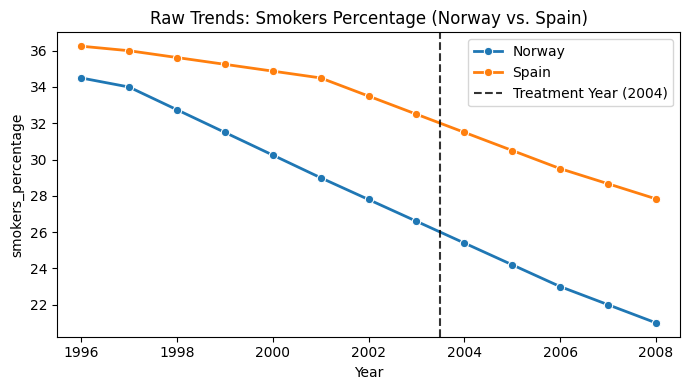

In [275]:
# --- Parallel Trend Assumption Check (Pre-2004) ---

## 📉 Visual Inspection (Pre-2004)

treatment = 2004
agg = df_final.groupby(['Year','Country'])['smokers_percentage'].mean().reset_index()

plt.figure(figsize=(7, 4))
sns.lineplot(data=agg, x='Year', y='smokers_percentage', hue='Country', marker='o', linewidth=2)
plt.axvline(treatment - 0.5, color='k', linestyle='--', alpha=0.8, label='Treatment Year (2004)')
plt.xlim(agg['Year'].min() - 0.5, agg['Year'].max() + 0.5)
plt.title('Raw Trends: Smokers Percentage (Norway vs. Spain)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
# 


In [276]:
import statsmodels.formula.api as smf

# Run DiD regression with tobacco_price as a control
model = smf.ols(
    'smokers_percentage ~ Norway + Post2004 + Treated + tobacco_price',
    data=df_final
).fit(cov_type='HC1')  # HC1 = robust SEs

print(model.summary())

# The coefficient for 'Treated' is your DiD estimate.
print(f"\nDiD Estimate (Treated): {model.params['Treated']:.4f}, p-value: {model.pvalues['Treated']:.4f}")

                            OLS Regression Results                            
Dep. Variable:     smokers_percentage   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     193.6
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           3.00e-16
Time:                        15:20:59   Log-Likelihood:                -25.739
No. Observations:                  26   AIC:                             61.48
Df Residuals:                      21   BIC:                             67.77
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        47.2248      1.433     32.949

In [277]:
df_final

,Year,Country,smokers_percentage,tobacco_price,Norway,Post2004,Treated
0,1996,Norway,34.500000,30.90,1,0,0
1,1997,Norway,34.000000,34.80,1,0,0
2,1998,Norway,32.750000,39.70,1,0,0
3,1999,Norway,31.500000,41.40,1,0,0
4,2000,Norway,30.250000,45.30,1,0,0
5,2001,Norway,29.000000,47.80,1,0,0
6,2002,Norway,27.800000,49.40,1,0,0
7,2003,Norway,26.600000,50.80,1,0,0
8,2004,Norway,25.400000,60.40,1,1,1
9,2005,Norway,24.200000,62.70,1,1,1


In [278]:
import statsmodels.formula.api as smf

# Run DiD regression with tobacco_price as a control
model = smf.ols(
    'smokers_percentage ~ Norway + Post2004 + Treated + tobacco_price',
    data=df_final
).fit(cov_type='cluster',
      cov_kwds={'groups': df_final['Norway']})  # HC1 = robust SEs

print(model.summary())

# The coefficient for 'Treated' is your DiD estimate.
print(f"\nDiD Estimate (Treated): {model.params['Treated']:.4f}, p-value: {model.pvalues['Treated']:.4f}")

                            OLS Regression Results                            
Dep. Variable:     smokers_percentage   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                    0.3404
Date:                Thu, 30 Oct 2025   Prob (F-statistic):              0.664
Time:                        15:20:59   Log-Likelihood:                -25.739
No. Observations:                  26   AIC:                             61.48
Df Residuals:                      21   BIC:                             67.77
Df Model:                           4                                         
Covariance Type:              cluster                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        47.2248      3.236     14.593

/Users/ulrikhaugland/data_science_venv/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '
